### Imports

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
import time
import pandas as pd
import math

### Import and preprocess dataset

In [2]:
# Transform the images from PIL to tensor and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [3]:
# Download the Dataset
mnist_trainset = datasets.MNIST(root='./data', train = True, download= True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train = False, download= True, transform=transform)
print (len(mnist_trainset))
print (len(mnist_testset))

100%|██████████| 9912422/9912422 [00:00<00:00, 401934582.16it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 102051974.58it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 163720737.57it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 26793992.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
10000


length of dataset 60000
Label of first data sample 5
visualize first data vector


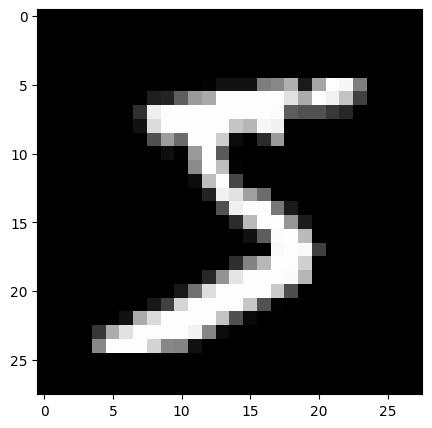

In [4]:
# Visualize 1 sample
x = mnist_trainset
print ('length of dataset', len(x))

x = mnist_trainset[0][1]
print ('Label of first data sample', x)

x = mnist_trainset[0][0]

print ('visualize first data vector')
plt.imshow(x.squeeze(), cmap='gray')

In [5]:
# Iterate over the train dataset to create x data matrix and y output vector of shapes n,784 and n,1 respectively
x_train = []
y_train = []

t0 = time.time()
for img, label in mnist_trainset:
    x_train.append(img.squeeze().view(-1))
    y_train.append(int(label))

t1 = time.time()

print ('time for train_Set', t1 - t0)
x_train = torch.stack(x_train, dim=0)
y_train = torch.Tensor(y_train)

time for train_Set 27.307374715805054


In [6]:
# Iterate over the test dataset to create x data matrix and y output vector of shapes n,784 and n,1 respectively
x_test = []
y_test = []

t0 = time.time()

for img, label in mnist_testset:
    x_test.append(img.squeeze().view(-1))
    y_test.append(int(label))

t1 = time.time()

print ('time for test_Set', t1 - t0)
x_test = torch.stack(x_test, dim=0)
y_test = torch.Tensor(y_test)

time for test_Set 2.8875644207000732


In [7]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([60000, 784]) torch.Size([60000]) torch.Size([10000, 784]) torch.Size([10000])


In [8]:
# function to convert y output vector of size n,1 to onhot vector of size n,10
def convert_to_one_hot(labels):
    unique = torch.unique(labels)
    onehot = torch.zeros((labels.shape[0], unique.shape[0]))
    onehot[torch.arange(labels.shape[0]), labels.int()] = 1.
    return onehot


In [9]:
# Visualize the onehot vector
y_test_one_hot = convert_to_one_hot(y_test)
print (y_test_one_hot.shape)

y_test[:10], y_test_one_hot[:10]

torch.Size([10000, 10])


(tensor([7., 2., 1., 0., 4., 1., 4., 9., 5., 9.]),
 tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]))

### SGD on Dataset

In [10]:
def accuracy(y_true, y_out_oh):
    return torch.sum(torch.argmax(y_out_oh, dim=1) == y_true)/y_true.shape[0]

def predict(X, w, b):
    return torch.matmul(X, w.T) + b

def loss(y_pred_oh, y_true_oh):
    return torch.sum(0.5*(y_pred_oh - y_true_oh)**2)/y_pred_oh.shape[0]

def plot_loss(loss_array):
    with torch.no_grad():
        plt.figure(1)
        plt.plot(torch.arange(0,len(loss_array)), loss_array)
        plt.title('Train Loss vs iters')
        plt.xlabel('iters')
        plt.ylabel('loss')
        plt.grid()
        plt.show()

def plot_accuracy(train_accuracy, test_accuracy):
    with torch.no_grad():
        plt.figure(2)
        plt.plot(torch.arange(0,len(train_accuracy)), train_accuracy, label='train')
        plt.plot(torch.arange(0,len(test_accuracy)), test_accuracy, label='test')
        plt.title('Accuracy vs iters')
        plt.xlabel('iters')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid()
        plt.show()

epoch = 10, train_loss = 0.2119123786687851, train_acc = 0.8489500284194946, test_acc = 0.857699990272522
epoch = 20, train_loss = 0.20535032451152802, train_acc = 0.8533166646957397, test_acc = 0.8632000088691711
epoch = 30, train_loss = 0.20240749418735504, train_acc = 0.8559333086013794, test_acc = 0.8644000291824341
epoch = 40, train_loss = 0.2006262093782425, train_acc = 0.8569666743278503, test_acc = 0.8636000156402588
epoch = 50, train_loss = 0.19934695959091187, train_acc = 0.8571833372116089, test_acc = 0.8646000027656555


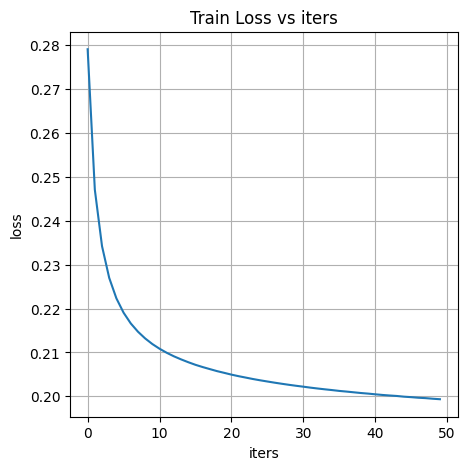

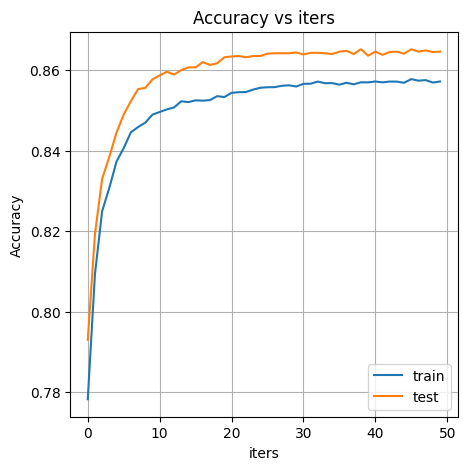

In [11]:
# Linear classifier to predict correct labels for mnist dataset
# Takes in input x_train, the input matrix of size, n,784, n = 60000 here
# Takes in input y_train, the output vector of size, n,1, n = 60000 here
# Takes in input y_train_oh, the one hot encoded output vector of size, n,10, n = 60000 here
# Takes in input x_test, the input matrix of size, n,784, n = 10000 here
# Takes in input y_test_true, the output vector of size, n,1, n = 10000 here
# Takes in input y_test_oh, the one hot encoded output vector of size, n,10, n = 10000 here

# lr is learning rate
# n_iters is number of iterations
# batch_size is required for minibatch SGD
def linear_model(x_train, y_train_true, y_train_oh,x_test, y_test_true, y_test_oh, lr = 0.001, n_epochs=50, n_iters=100, batch_size = 4096, verbose=False):

    # create weights and bias matrix
    # weights has a shape of 10, 784
    # biases has a shape of 1,1

    input_dim = x_train.shape[1]
    output_dim = y_train_oh.shape[1]

    # weights and biases have been initialized as 0
    w = torch.zeros(output_dim, input_dim)
    b = torch.zeros(1,1)

    # store train loss, train accuracy and test accuracy
    loss_array = []
    train_accuracy_array = []
    test_accuracy_array = []

    for epoch in range(n_epochs):

        for iter in range(n_iters):
            # generate random indices from 0 - len(input vector), 60000 in this case,
            # generate a total of batch_size indices
            # indices are generated with replacement, so we can have multiple of same index
            random_batch_indices = torch.randint(x_train.shape[0],(batch_size,))

            # get y_pred that is one hot encoded
            # ypred = X.W + b
            out = predict(x_train[random_batch_indices], w, b)

            # calculate loss mse loss
            # loss = 1/2 * (ypred_oh - ytrue_oh)**2 / N
            l = loss(out, y_train_oh[random_batch_indices])

            # calculate gradients for weights and bias
            # dl/dw = ((ypred_oh - ytrue_oh).T).X / N
            w_grad = torch.matmul((out - y_train_oh[random_batch_indices]).T, x_train[random_batch_indices]) / out.shape[0]
            # dl/dw = sum(ypred_oh - ytrue_oh) / N
            b_grad = torch.sum(out - y_train_oh[random_batch_indices]) / out.shape[0]

            # update gradients
            w -= lr*w_grad
            b -= lr*b_grad

            
        # loss for entire dataset
        out = predict(x_train, w, b)
        l = loss(out, y_train_oh)
        loss_array.append(l.item())

        # train accuracy in entire dataset
        train_acc = accuracy(y_train_true, out)
        train_accuracy_array.append(train_acc.item())

        # test accuracy in entire dataset
        out_test = predict(x_test, w, b)
        test_acc = accuracy(y_test_true, out_test)
        test_accuracy_array.append(test_acc.item())

        # print stats if required
        if verbose and (epoch+1) % 10 == 0:
            print ('epoch = {}, train_loss = {}, train_acc = {}, test_acc = {}'.format(epoch+1, l, train_acc, test_acc))

        # if loss is not defined due to poor lr selection, break the loop
        if l.item() == torch.inf or math.isnan(l.item()):
            print ('--- loss explodes ---')
            break
    
        
    return w, b, loss_array, train_accuracy_array, test_accuracy_array

# convert y to one hot encoded
y_train_oh = convert_to_one_hot(y_train)
y_test_oh = convert_to_one_hot(y_test)


w,b,loss_arr,train_acc, test_acc = linear_model(x_train, y_train, y_train_oh,x_test, y_test, y_test_oh, verbose=True)

# plot graphs
plot_loss(loss_arr)
plot_accuracy(train_acc, test_acc)

### Choice of Learning Rate

In [12]:
# # This takes approximately 3 hrs to run, it is used to find the best combination of iterations for SGD, total epochs, batchsize and learning rate
# # In case only the results need be validated, comment this part and move with next section.
# # store all the training data and stats to tabulate and compare later
# summary_object = []

# # test variety of batches and learning rates
# for epoch in [20,40,60,80, 100]:
#     for iter in [25,50,75,100]:
#         for batch in [1,10,100,1000,10000]:
#             for lr in [0.1,0.01,0.001,0.0001, 0.00001]:

#                 print ()
#                 print (' ------------------------------------------ ')
#                 print ('epoch:{}, iter:{}, batchsize: {} and learning rate: {}'.format(epoch, iter, batch, lr))
#                 # time before training start
#                 t0 = time.time()

#                 # convert y to one hot encoded 
#                 y_train_oh = convert_to_one_hot(y_train)
#                 y_test_oh = convert_to_one_hot(y_test)
#                 w,b,train_loss, train_acc, test_acc = linear_model(x_train, y_train, y_train_oh, x_test, y_test, y_test_oh, lr=lr, n_epochs= epoch, n_iters=iter, batch_size=batch)

#                 # time after train end
#                 t1 = time.time()
                
#                 # plot graphs
#                 plot_loss(train_loss)
#                 plot_accuracy(train_acc, test_acc)

#                 temp_summary = {
#                     'epoch': epoch,
#                     'iter': iter,
#                     'batch_size': batch,
#                     'learning_rate': lr,
#                     'test_acc': max(test_acc),
#                     'train_acc': max(train_acc),
#                     'time': t1-t0
#                 }

#                 summary_object.append(temp_summary)

In [13]:
# # create dataframe of the generated data stats and compare results
# df = pd.DataFrame.from_records(summary_object)
# print('--- Effect of Learning_rate ---')
# print(df.sort_values(by=['learning_rate', 'batch_size']))
# print()
# print ('--------------')
# print('--- Sort by accuracy ---')
# print(df.sort_values(by=['test_acc','train_acc']))
# df.to_csv('summary.csv')

In [14]:
# I have already run this once and results can be loaded from S3
from urllib import request
request.urlretrieve('https://d1u36hdvoy9y69.cloudfront.net/cs-228-intro-to-dl/summary.csv','summary.csv')
df = pd.read_csv('summary.csv')
df

,Unnamed: 0,epoch,iter,batch_size,learning_rate,test_acc,train_acc,time
0,0,20,25,1,0.10000,0.0980,0.098717,0.300203
1,1,20,25,1,0.01000,0.1010,0.102183,0.248212
2,2,20,25,1,0.00100,0.7194,0.712667,2.121936
3,3,20,25,1,0.00010,0.6987,0.688800,2.221480
4,4,20,25,1,0.00001,0.4759,0.458017,2.596230
...,...,...,...,...,...,...,...,...
495,495,100,100,10000,0.10000,0.0980,0.098717,4.171421
496,496,100,100,10000,0.01000,0.0980,0.098717,3.924819
497,497,100,100,10000,0.00100,0.8653,0.857700,368.458464
498,498,100,100,10000,0.00010,0.8575,0.848650,368.516162


From the above dataframe, we can see that the best learning rate is **0.001**

### Role of batch Size


 ------------------------------------------ 
batch size: 1 and learning rate: 0.001


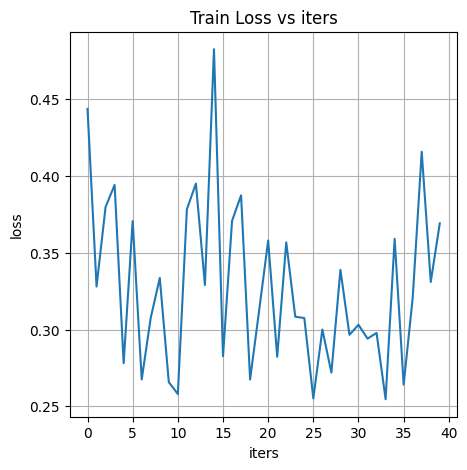

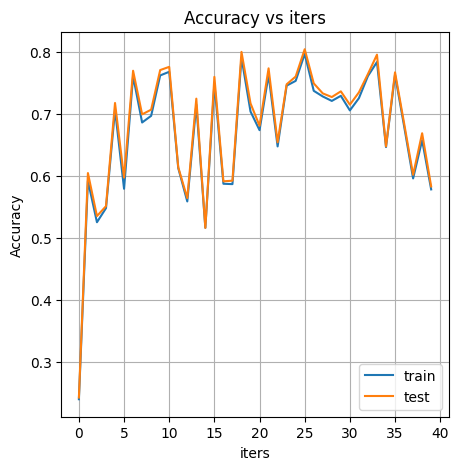


 ------------------------------------------ 
batch size: 10 and learning rate: 0.001


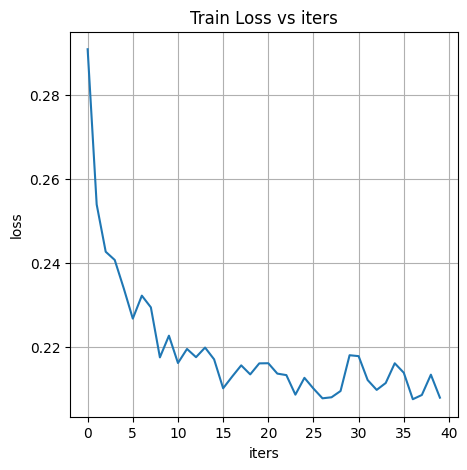

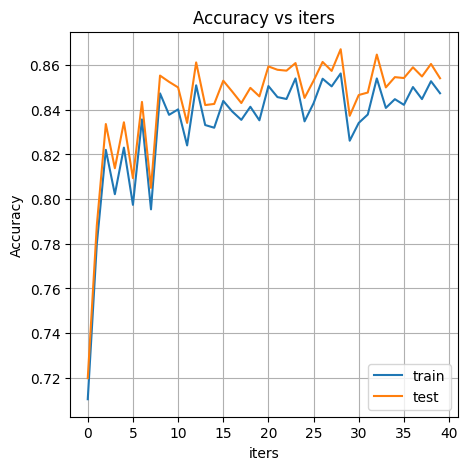


 ------------------------------------------ 
batch size: 100 and learning rate: 0.001


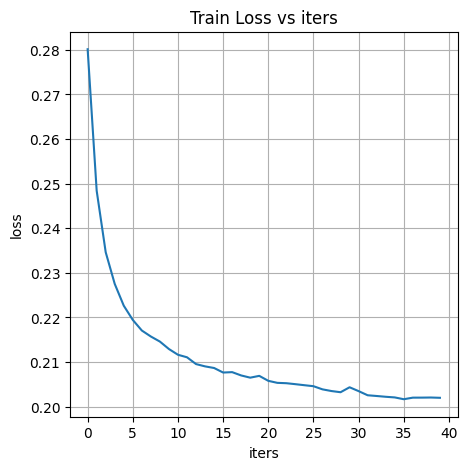

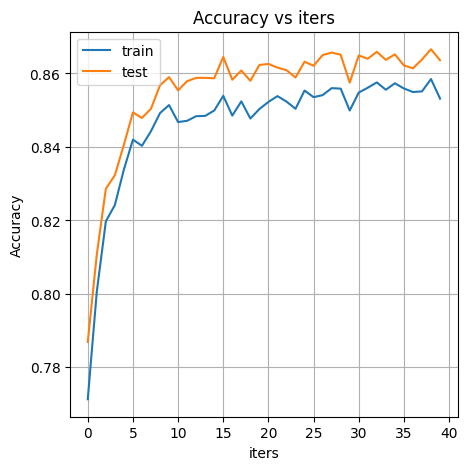


 ------------------------------------------ 
batch size: 1000 and learning rate: 0.001


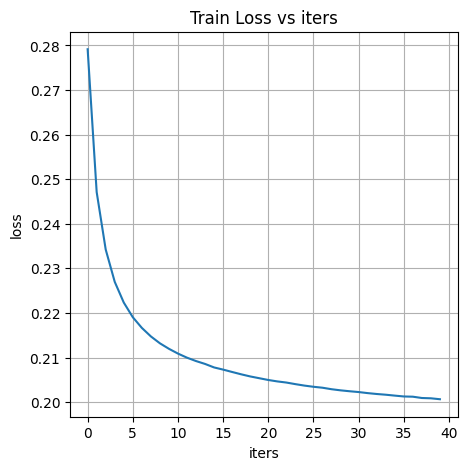

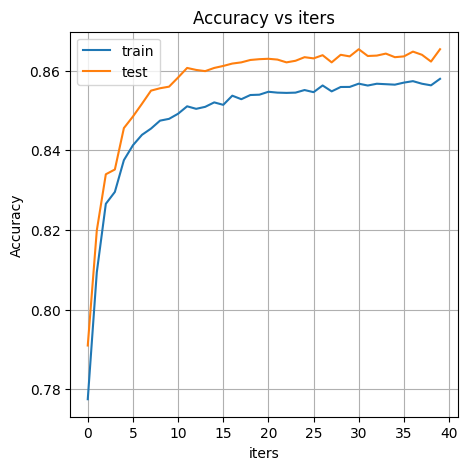


 ------------------------------------------ 
batch size: 10000 and learning rate: 0.001


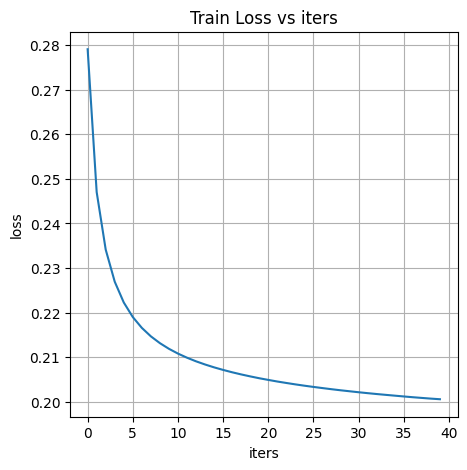

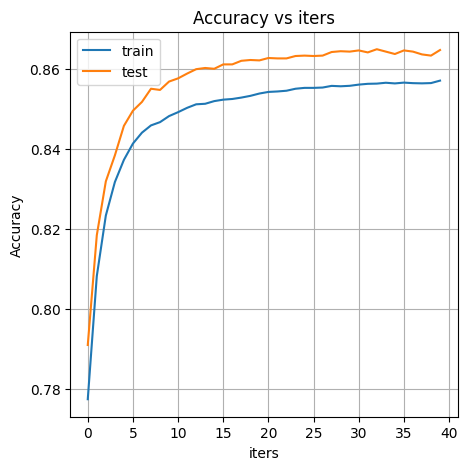

In [15]:
# create summary object to store stats
summary_objects = []

# fix the learning rate, n_iters and n_epochs as computed from experimentation above
learning_rate = 0.001
n_epoch = 40
n_iter = 100

# Test the variety of batch sizes
for batch in [1,10,100,1000,10000]:
    
    print ()
    print (' ------------------------------------------ ')
    print ('batch size: {} and learning rate: {}'.format(batch, learning_rate))

    # time before train start
    t0 = time.time()

    # convert y to one hot encoded
    y_train_oh = convert_to_one_hot(y_train)
    y_test_oh = convert_to_one_hot(y_test)
    w,b,train_loss, train_acc, test_acc = linear_model(x_train, y_train, y_train_oh, x_test, y_test, y_test_oh, lr=learning_rate, n_epochs= n_epoch, n_iters=n_iter, batch_size=batch)
    
    # time after train end
    t1 = time.time()

    # plot grpahs
    plot_loss(train_loss)
    plot_accuracy(train_acc, test_acc)

    temp_summary = {
    'batch_size': batch,
    'learning_rate': learning_rate,
    'test_acc': max(test_acc),
    'train_acc': max(train_acc),
    'time': t1-t0
    }

    summary_objects.append(temp_summary)

In [16]:
# create a dataframe from all the results as computed above
df = pd.DataFrame.from_records(summary_objects)
print (df)

   batch_size  learning_rate  test_acc  train_acc       time
0           1          0.001    0.8049   0.797250   2.622874
1          10          0.001    0.8671   0.856250   3.071779
2         100          0.001    0.8666   0.858483   3.449923
3        1000          0.001    0.8654   0.857967  10.710572
4       10000          0.001    0.8650   0.857133  98.582386


**Role of batch size.**

As batch size increases the cost of computation and time taken for forward and backward pass increases. We can see the time being directly proportional to the batch size.

Also, as we increase the batch size, we are getting better train and test accuracy and this means that the model is able to generalize better and not overfit to the data.

However, even though the time and computation increases significantly for increase in batch size, the accuracy seems to be stagnating as a fixed level.

### Role of Dataset Size


 ------------------------------------------ 
batch size: 100,  dataset size: 100 and learning rate: 0.001


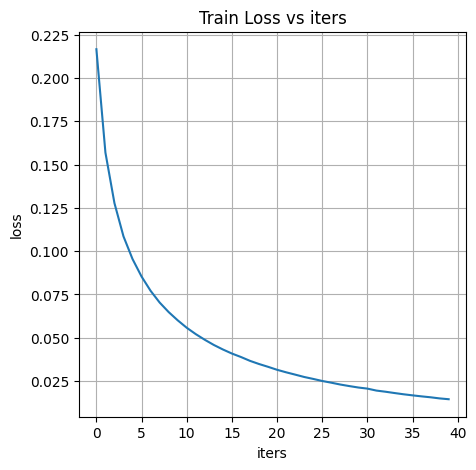

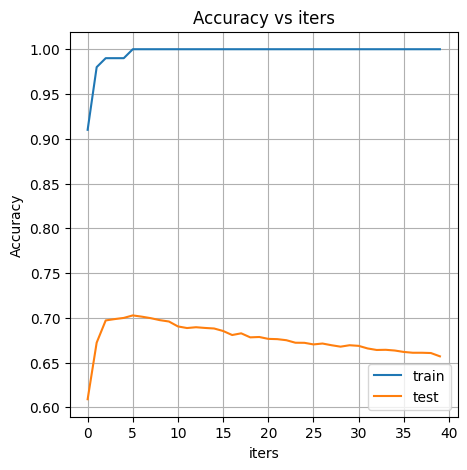


 ------------------------------------------ 
batch size: 100,  dataset size: 500 and learning rate: 0.001


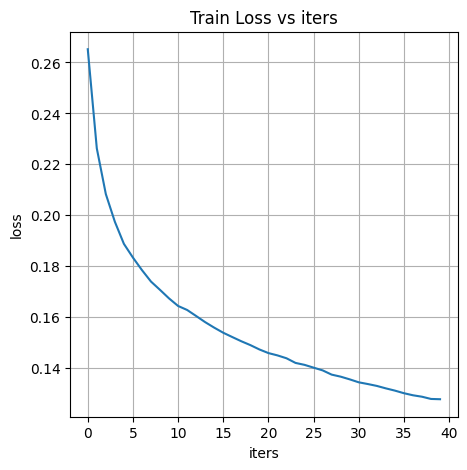

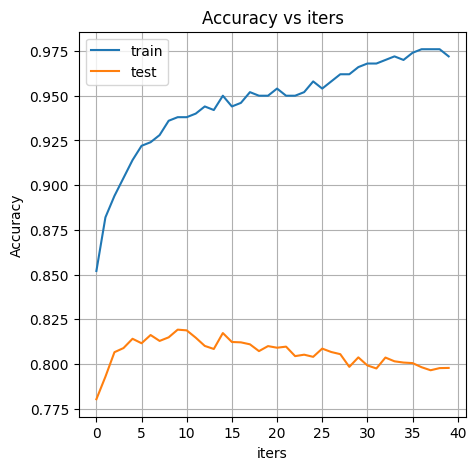


 ------------------------------------------ 
batch size: 100,  dataset size: 1000 and learning rate: 0.001


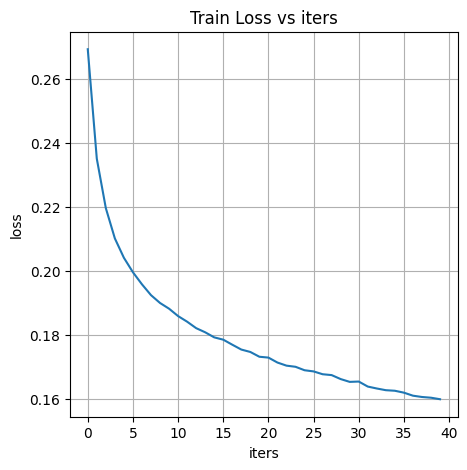

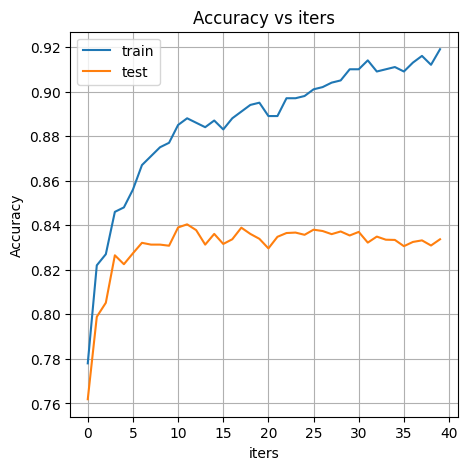


 ------------------------------------------ 
batch size: 100,  dataset size: 10000 and learning rate: 0.001


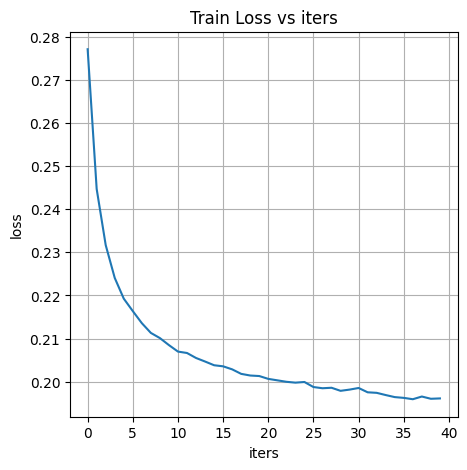

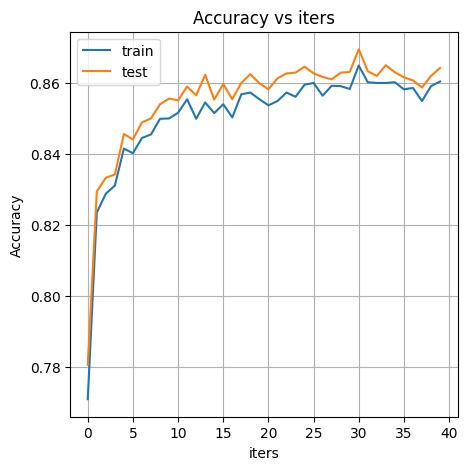

In [17]:
# create summary object to store stats
summary_object = []

# fix the learning rate, n_iters and n_epochs as computed from experimentation above
learning_rate = 0.001
n_epoch = 40
n_iter = 100

# fix the batch size as provided in problem statement
batch_size = 100

# test for a variety of dataset sizes
for dataset_size in [100, 500, 1000, 10000]:

    print ()
    print (' ------------------------------------------ ')
    print ('batch size: {},  dataset size: {} and learning rate: {}'.format(batch_size, dataset_size, learning_rate))

    # time before train start
    t0 = time.time()

    # convert y to one hot encoded
    y_train_oh = convert_to_one_hot(y_train)
    y_test_oh = convert_to_one_hot(y_test)

    # generate random indices from all the training samples (60000) and pick the top XXX samples where XXX is dataset size.
    # This means generate random numbers from from 0 to len(dataset) and pick only required size so that we can have shuffled data without replacement
    # the random numbers are generated from normal distribution
    random_indices = torch.randperm(y_train_oh.shape[0])[:dataset_size]

    w,b,train_loss, train_acc, test_acc = linear_model(x_train[random_indices], y_train[random_indices], y_train_oh[random_indices], x_test, y_test, y_test_oh, lr=learning_rate, n_epochs= n_epoch, n_iters=n_iter, batch_size=batch_size)

    # time after train end
    t1 = time.time()
    
    # plot graphs
    plot_loss(train_loss)
    plot_accuracy(train_acc, test_acc)

    temp_summary = {
        'dataset_size':dataset_size,
        'batch_size': batch_size,
        'learning_rate': learning_rate,
        'test_acc': max(test_acc),
        'train_acc': max(train_acc),
        'time': t1-t0
    }

    summary_object.append(temp_summary)

In [18]:
# create a dataframe from the data generated above and compare results
df = pd.DataFrame.from_records(summary_object)
print('--- Effect of Learning_rate ---')
print(df.sort_values(by=['learning_rate', 'batch_size']))
print()

--- Effect of Learning_rate ---
   dataset_size  batch_size  learning_rate  test_acc  train_acc      time
0           100         100          0.001    0.7027     1.0000  1.845775
1           500         100          0.001    0.8192     0.9760  1.405012
2          1000         100          0.001    0.8404     0.9190  1.427882
3         10000         100          0.001    0.8695     0.8649  1.790095



**Role of dataset size.**

As the dataset size increases, test accuracy increases and train accuracy decreases for the same number of epochs and iterations.

This means we are generalizing on the data more and not overfitting the data.

Generally if we train a simple model longer on smaller dataset, we tend to overfit on train set and perform poorly on the test set. This can be seen in the dataframe results above

### Inbuilt Pytorch Classifier

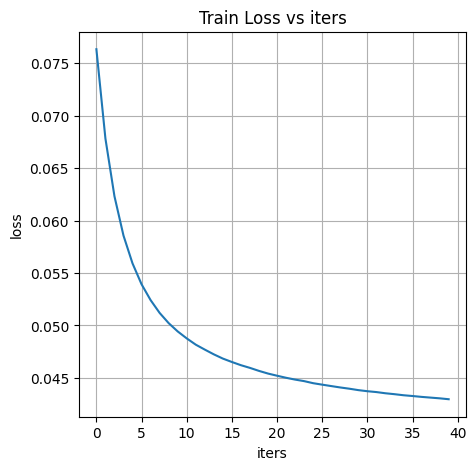

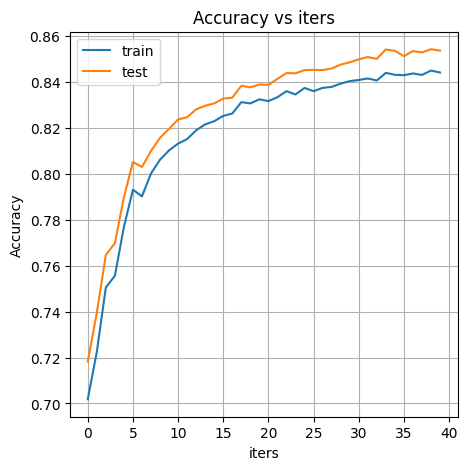

In [19]:
# create a linear model
model = torch.nn.Linear(784, 10, bias=True)

# initialize weights to 0
with torch.no_grad():
    model.weight.zero_()
    model.bias.zero_()

# use MSE loss
criterion = torch.nn.MSELoss()

# use SGD optimizer with 0.001 learning rate, same as out model
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# convert y to one hot encoded vectors
y_train_oh = convert_to_one_hot(y_train)


# Constant Hyperparameters
batch_size = 100
n_epochs = 40
n_iters = 100

# store stats
all_loss = []
train_acc = []
test_acc = []

for epoch in range(n_epochs):

    for iter in range(n_iters):

        # generate a random batch of size 100
        random_batch_indices = torch.randint(x_train.shape[0],(batch_size,))

        # forward pass
        output = model(x_train[random_batch_indices])
        
        # loss functiom
        loss = criterion(output, y_train_oh[random_batch_indices])
        
        # backprop
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    with torch.no_grad():
        
        # train loss on complete dataset
        output = model(x_train)
        train_l = criterion(output, y_train_oh)
        all_loss.append(train_l)

        # train accuracy
        train_acc.append(accuracy(y_train, output))
        
        # test accuracy
        output = model(x_test)
        test_acc.append(accuracy(y_test, output))


# plot graphs
plot_loss(all_loss)
plot_accuracy(train_acc, test_acc)

In [20]:
print ('max train acc is {} and max test accuracy is {}'.format(max(train_acc), max(test_acc)))

max train acc is 0.8450166583061218 and max test accuracy is 0.8543000221252441


The max train and test accuracy of pytorch implementation with similar initialization is same as the max test train accuracy of self implementation and can be verified and seen in dataframes above

### Generate PDF

In [21]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,629 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,033 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Pa

In [ ]:
!jupyter nbconvert --log-level CRITICAL --to pdf CS_228_DL_HW_1.ipynb